## The dataset

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real homes published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive home in the entire dataset?

Let's start with precisely that question... Good luck!


In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [113]:
df = pd.read_csv('assets/real_estate.csv', sep=';')
df.sample(5)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
14859,14860,153912240,False,deplace,910750918.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,1.0,1.0,62.0,295000,...,0,0,0,0,0,0,"40,38979","-3,68888",NaN,NaN
13926,13927,152096193,False,rover homes,914890778.0,https://www.fotocasa.es/vivienda/torrejon-de-a...,3.0,2.0,136.0,310000,...,0,0,0,0,0,1,"40,4244241","-3,5415077",NaN,NaN
12465,12466,153421830,False,outletdeviviendas,911369773.0,https://www.fotocasa.es/es/comprar/vivienda/mi...,3.0,2.0,126.0,103700,...,0,0,0,0,0,0,"40,8596120255223","-3,70722127852947",NaN,NaN
3718,3719,153137175,False,unica inmobiliaria,914892919.0,https://www.fotocasa.es/es/comprar/vivienda/mo...,3.0,1.0,133.0,750000,...,0,0,0,0,0,0,"40,45391","-3,68918",NaN,NaN
10690,10691,153281732,False,atico a inmobiliaria,916350468.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,NaN,156000,...,0,0,0,0,0,0,"40,23348","-3,76602",NaN,NaN


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

Show df data types

In [115]:
df.dtypes

Unnamed: 0            int64
id_realEstates        int64
isNew                  bool
realEstate_name      object
phone_realEstate    float64
url_inmueble         object
rooms               float64
bathrooms           float64
surface             float64
price                 int64
date                 object
description          object
address              object
country              object
level1               object
level2               object
level3               object
level4               object
level5               object
level6               object
level7               object
level8               object
upperLevel           object
countryId             int64
level1Id              int64
level2Id              int64
level3Id              int64
level4Id              int64
level5Id              int64
level6Id              int64
level7Id              int64
level8Id              int64
accuracy              int64
latitude             object
longitude            object
zipCode             

Show number of rows and columns

In [116]:
df.shape

(15335, 37)

In [117]:
df.describe()

,Unnamed: 0,id_realEstates,phone_realEstate,rooms,bathrooms,surface,price,countryId,level1Id,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,zipCode,customZone
count,15335.000000,1.533500e+04,1.454100e+04,14982.000000,14990.000000,14085.000000,1.533500e+04,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.0,15335.000000,0.0,0.0
mean,7668.000000,1.524371e+08,9.143423e+08,3.231611,2.150233,196.916436,4.773036e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166873,NaN,NaN
std,4426.977524,2.277286e+06,7.516036e+06,1.393106,1.292079,2182.758313,5.912942e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.372875,NaN,NaN
min,1.000000,1.221584e+08,8.762742e+08,1.000000,1.000000,15.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
25%,3834.500000,1.519456e+08,9.113649e+08,2.000000,1.000000,80.000000,1.690000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
50%,7668.000000,1.532413e+08,9.121841e+08,3.000000,2.000000,114.000000,2.800000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
75%,11501.500000,1.538105e+08,9.148904e+08,4.000000,3.000000,205.000000,5.400000e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,NaN
max,15335.000000,1.540033e+08,9.887761e+08,30.000000,20.000000,249000.000000,8.500000e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,NaN,NaN


#### What is the most expensive home in the dataset? (★☆☆)

In [118]:
print("The most expensive home is " + str(df['price'].max())) 

The most expensive home is 8500000


#### What is cheapest home in the dataset? (★☆☆)

Working only with houses with prices greater than 0

In [119]:
#Filter
price_filter= df[df['price']>0]

In [120]:
print("The cheapest home is " + str(price_filter['price'].min()))

The cheapest home is 600


#### What is the biggest and the smallest home in the dataset? (★☆☆)

In [121]:
biggestHome = df['surface'].max()
print("The biggest home is " + str(biggestHome))


The biggest home is 249000.0


In [122]:
smallestHome = df['surface'].min()
print("The biggest home is " + str(smallestHome))

The biggest home is 15.0


#### How many populations (level5) the dataset contains? (★☆☆)

In [123]:
print("Number of level 5 populations: " + str(df['level5'].value_counts().count()))

print("Number of houses per level 5 populations: " )

print(df['level5'].value_counts())

Number of level 5 populations: 168
Number of houses per level 5 populations: 
 Madrid Capital         6643
Alcalá de Henares        525
Las Rozas de Madrid      383
Móstoles                 325
Getafe                   290
                        ... 
Brea de Tajo               1
El Atazar                  1
Piñuécar-gandullas         1
Braojos                    1
Montejo de la Sierra       1
Name: level5, Length: 168, dtype: int64


#### Does the dataset contain NAs? (★☆☆)


In [124]:
df.isnull().sum()

Unnamed: 0              0
id_realEstates          0
isNew                   0
realEstate_name        10
phone_realEstate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                    0
description           142
address                 0
country                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperLevel              0
countryId               0
level1Id                0
level2Id                0
level3Id                0
level4Id                0
level5Id                0
level6Id                0
level7Id                0
level8Id                0
accuracy                0
latitude                0
longitude               0
zipCode             15335
customZone          15335
dtype: int64

#### Delete the NAs of the dataset, if applicable (★★☆)

In [125]:
#Deleting columns zipCode and customZone because is null in every row.

df = df.drop(["zipCode","customZone"], axis=1)
df.shape

(15335, 35)

In [126]:
#Deleting column Unnamed: 0 as it is not useful

df = df.drop(["Unnamed: 0"], axis=1)
df.shape

(15335, 34)

In [127]:
#Change phone_realEstate, rooms and bathrooms from float to int
df['phone_realEstate'] = df['phone_realEstate'].astype('Int64')
df['rooms'] = df['rooms'].astype('Int64')
df['bathrooms'] = df['bathrooms'].astype('Int64')

df.dtypes

id_realEstates        int64
isNew                  bool
realEstate_name      object
phone_realEstate      Int64
url_inmueble         object
rooms                 Int64
bathrooms             Int64
surface             float64
price                 int64
date                 object
description          object
address              object
country              object
level1               object
level2               object
level3               object
level4               object
level5               object
level6               object
level7               object
level8               object
upperLevel           object
countryId             int64
level1Id              int64
level2Id              int64
level3Id              int64
level4Id              int64
level5Id              int64
level6Id              int64
level7Id              int64
level8Id              int64
accuracy              int64
latitude             object
longitude            object
dtype: object

In [128]:
#Deleting rows with null values in column "surface" as it may affect the analysis later.

df = df.dropna(subset=['surface'])
df.isnull().sum()

id_realEstates          0
isNew                   0
realEstate_name        10
phone_realEstate      721
url_inmueble            0
rooms                 322
bathrooms             295
surface                 0
price                   0
date                    0
description           129
address                 0
country                 0
level1                  0
level2                  0
level3                  0
level4               6237
level5                  0
level6              13408
level7               2024
level8               7749
upperLevel              0
countryId               0
level1Id                0
level2Id                0
level3Id                0
level4Id                0
level5Id                0
level6Id                0
level7Id                0
level8Id                0
accuracy                0
latitude                0
longitude               0
dtype: int64

We shouldn't delete every row or column with null values because it may affect the analysis.

#### What is the mean of prices in the population (level5) of "Arroyomolinos (Madrid)"? (★★☆)

In [129]:
#Working with filtered houses (Prices greater than 0)
data_price=df[df['price']>0]
print("The mean of prices in Arroyomolinos is " + str(round(data_price[data_price.level5 == "Arroyomolinos (Madrid)"].price.mean(),2)))

The mean of prices in Arroyomolinos is 299892.69


#### Plot the histogram of prices for the population (level5) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

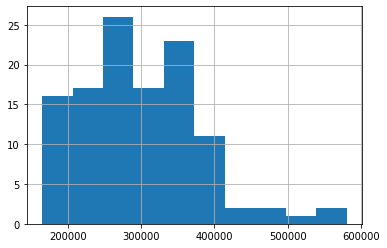

In [130]:
df_arroyo= data_price[data_price.level5 == "Arroyomolinos (Madrid)"].price.hist()

The prices of most of the homes are between 200 000 and 400 000 

#### Now let's work with the "south belt" of madrid. Make a subsetting that contains the following populations (level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆) 

In [131]:
south_belt = df[df["level5"].isin(["Fuenlabrada","Leganés","Getafe","Alcorcón"])]
south_belt['level5'].value_counts()

Getafe         241
Fuenlabrada    197
Leganés        176
Alcorcón       173
Name: level5, dtype: int64

#### Make a bar plot of the median of prices (★★★) 

<AxesSubplot:xlabel='level5'>

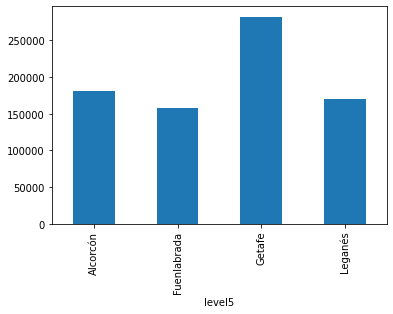

In [132]:
#Filter

south_belt=south_belt[south_belt['price']>0]

#Make plot 

south_belt.groupby('level5')['price'].median().plot.bar()

#### Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (★★★) 

In [133]:
print("Sample mean:")

mean = south_belt[['price', 'rooms','surface','bathrooms']].mean()
print(mean)

print("Variance:")

variances = south_belt[['price', 'rooms','surface','bathrooms']].var()
print(variances)

Sample mean:
price        225446.676129
rooms             3.012970
surface         111.298065
bathrooms         1.629389
dtype: float64
Variance:
price        1.462553e+10
rooms        7.063251e-01
surface      4.275920e+03
bathrooms    5.773123e-01
dtype: float64


#### What is the most expensive home of each population? (★★☆) 

In [134]:
expensive_south = south_belt.groupby('level5')['price'].agg('max')
print(expensive_south)

level5
Alcorcón        950000
Fuenlabrada     490000
Getafe         1050000
Leganés         650000
Name: price, dtype: int64


#### Normalize the variable of prices for each population and plot the 4 histograms in the same plot (★★★) 

"We can normalize a histogram in Matplotlib using the density keyword argument and setting it to True. By normalizing a histogram, the sum of the bar area equals 1."

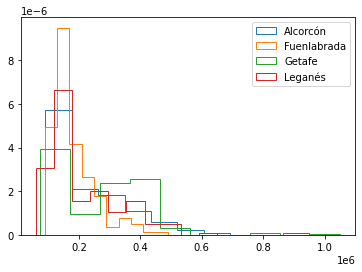

In [135]:

alcorcon= south_belt[south_belt.level5 == "Alcorcón"]
fuenlabrada= south_belt[south_belt.level5 == "Fuenlabrada"]
getafe = south_belt[south_belt.level5 == "Getafe"]
leganes = south_belt[south_belt.level5 == "Leganés"]

fig,ax = plt.subplots()
ax.hist(alcorcon["price"], label="Alcorcón", histtype="step", density=True) 
ax.hist(fuenlabrada["price"], label="Fuenlabrada", histtype="step", density=True) 
ax.hist(getafe["price"], label="Getafe", histtype="step", density=True) 
ax.hist(leganes["price"], label="Leganés", histtype="step", density=True) 
plt.legend()
plt.show()

#### Make a plot of the coordinates (lat and long) of the south belt of Madrid by color of each population (★★★★) 
This is a extremely hard exercise and we highly recommend to do it at the end of everything

In [136]:
# Run in console the following command before run the rest of code:
# jupyter nbextension enable --py --sys-prefix ipyleaflet

from ipyleaflet import Map, basemaps ,Marker

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, basemap=basemaps.Stamen.Terrain)

map

Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [137]:
## HERE: plot the coordinates of the estates

#Empty list to store homes data
homes_location = []

for i in range(len(south_belt)):
	homes_location.append([south_belt.iloc[i]['latitude'], south_belt.iloc[i]['longitude']])


## PUT HERE YOUR CODE:

for loc in homes_location:
	marker = Marker(location = loc, draggable = False)
	map.add_layer(marker)


display(map)



Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

#### What can you say about the price per square meter between the towns of Getafe and Alcorcón?

In [138]:
south_belt.loc[:,"Price_per_square"] = (south_belt["price"]/south_belt["surface"])

print("Price per square meter Getafe")
print(south_belt[south_belt.level5 == "Getafe"].Price_per_square.mean())

print("Price per square meter Alcorcón")
print(south_belt[south_belt.level5 == "Alcorcón"].Price_per_square.mean())

Price per square meter Getafe
2174.593461875994
Price per square meter Alcorcón
2239.302480199618


The prices are very similar, however it is higher for Alcorcón.

#### Reload the data, is the average of "Valdemorillo" and "Galapagar" prices the same?

In [139]:
#Work with prices greater than 0
df_filter =df[df['price']>0]

print("Average of price: ")
print("Valdemorillo: " + str(df_filter[df_filter.level5 == "Valdemorillo"].price.mean()))
print("Galapagar: "+ str(df_filter[df_filter.level5 == "Galapagar"].price.mean()))

Average of price: 
Valdemorillo: 371583.0188679245
Galapagar: 372108.6533333333


The average prices are very similar in both cases

#### What happens if we do the same analysis for price/m2 (★★☆) 

In [140]:
df_filter["Price_per_square"] = (df_filter["price"]/df_filter["surface"])

print("Price per square Valdemorillo")
print(df_filter[df_filter.level5 == "Valdemorillo"].Price_per_square.mean())

print("Price per square meter Galapagar")
print(df_filter[df_filter.level5 == "Galapagar"].Price_per_square.mean())

Price per square Valdemorillo
1317.9502109024984
Price per square meter Galapagar
1606.3240303094024


/tmp/ipykernel_1794/2066603785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter["Price_per_square"] = (df_filter["price"]/df_filter["surface"])


In this case the average of price/m2 is higher for Galapagar

#### Could you say there is a relation between surface and price? (★★☆) 
Hint: make a scatter plot.

Text(0, 0.5, 'Price')

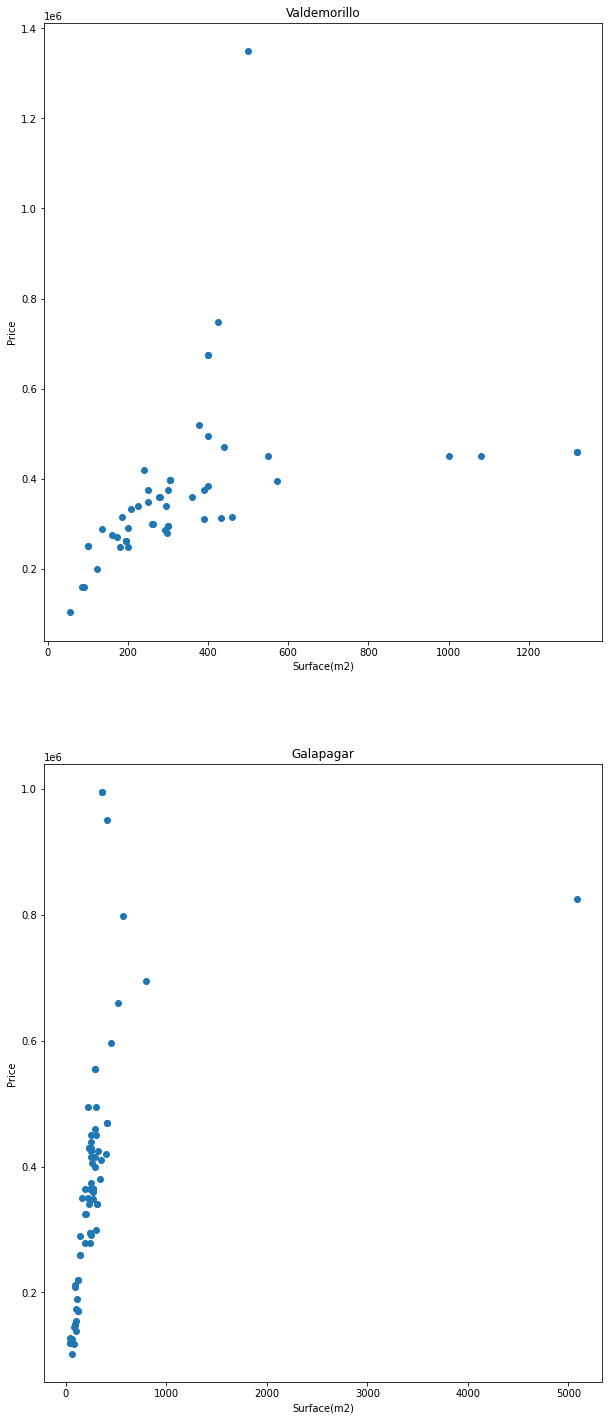

In [141]:

v = df_filter[df_filter.level5 == "Valdemorillo"]
g = df_filter[df_filter.level5 == "Galapagar"]



fig, ax = plt.subplots(2, figsize=(10, 25))


ax[0].scatter(x = v["surface"], y = v["price"])
ax[0].set_title('Valdemorillo')
ax[0].set_xlabel('Surface(m2)')
ax[0].set_ylabel('Price')



ax[1].scatter(x = g["surface"], y = g["price"])
ax[1].set_title('Galapagar')
ax[1].set_xlabel('Surface(m2)')
ax[1].set_ylabel('Price')



#### Make the same plot for 4 different populations (level5) and rearrange them on the same graph? (★★☆) 
Hint: make a scatter plot of each population using subplots.

Text(0, 0.5, 'Price')

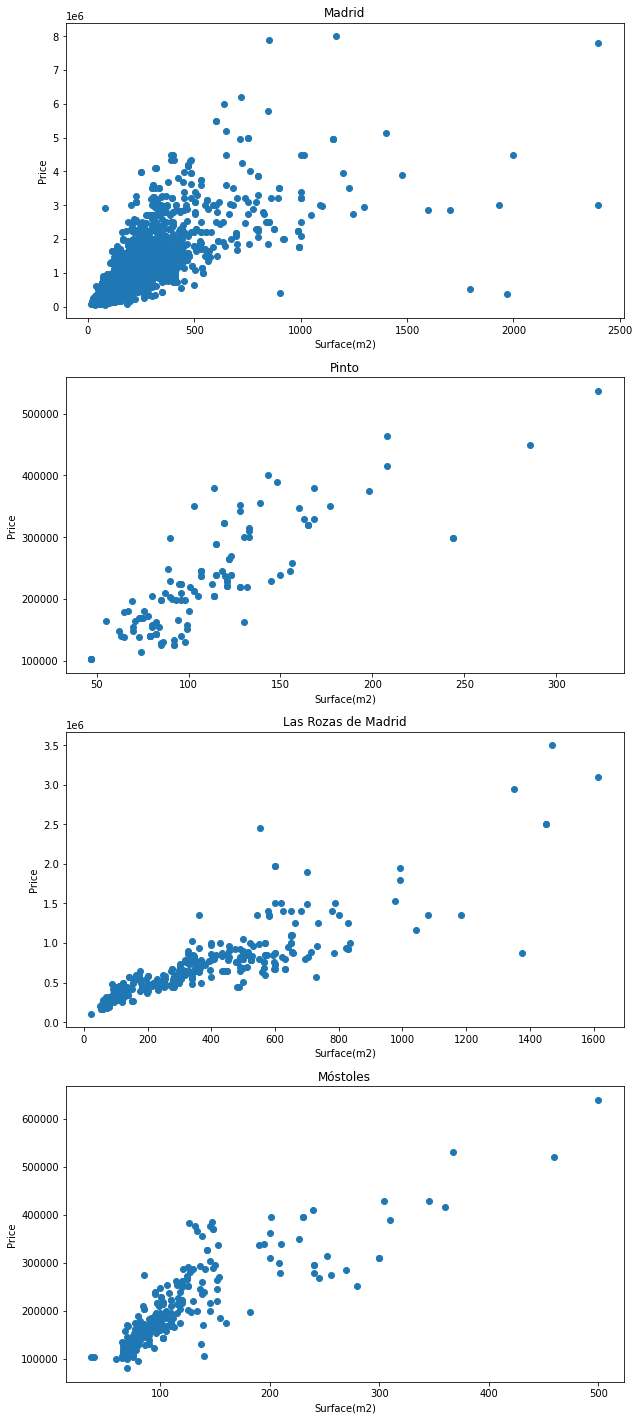

In [142]:

madrid = df_filter[df_filter.level5 == " Madrid Capital"]
pinto = df_filter[df_filter.level5 == "Pinto"]
las_rozas = df_filter[df_filter.level5 == "Las Rozas de Madrid"]
mostoles = df_filter[df_filter.level5 == "Móstoles"]


fig, ax = plt.subplots(4, figsize=(10, 25))


ax[0].scatter(x = madrid["surface"], y = madrid["price"])
ax[0].set_title('Madrid')
ax[0].set_xlabel('Surface(m2)')
ax[0].set_ylabel('Price')



ax[1].scatter(x = pinto["surface"], y = pinto["price"])
ax[1].set_title('Pinto')
ax[1].set_xlabel('Surface(m2)')
ax[1].set_ylabel('Price')


ax[2].scatter(x = las_rozas["surface"], y = las_rozas["price"])
ax[2].set_title('Las Rozas de Madrid')
ax[2].set_xlabel('Surface(m2)')
ax[2].set_ylabel('Price')

ax[3].scatter(x = mostoles["surface"], y = mostoles["price"])
ax[3].set_title('Móstoles')
ax[3].set_xlabel('Surface(m2)')
ax[3].set_ylabel('Price')


The plots suggest that there could be a correlation between price and surface.

#### How many  real estate agencies the dataset contains? (★★☆) 

In [143]:
print("Number of real estate agencies: " + str(df['realEstate_name'].value_counts().count()))

print("Number of houses per real estate agency: " )

print(df['realEstate_name'].value_counts())

Number of real estate agencies: 1711
Number of houses per real estate agency: 
engel volkers madrid             469
infocasa consulting              300
housell                          250
outletdeviviendas                247
vivienda2                        198
                                ... 
luis garcia                        1
gestiones inmobiliarias raisa      1
selektia living                    1
inmo criteria caixa sau            1
nieves                             1
Name: realEstate_name, Length: 1711, dtype: int64


#### What is the population (level 5) that contains the most houses? (★★☆) 

In [144]:
print("The population that contains the most houses is " + str(df['level5'].value_counts().head(1)))

The population that contains the most houses is  Madrid Capital    6237
Name: level5, dtype: int64
